In [1]:
import sys
import numpy as np
import pandas as pd
import nltk
import re
import pickle
from nltk.corpus import stopwords
from sklearn.datasets import load_files
nltk.download('stopwords')
import matplotlib.pyplot as plt
!{sys.executable} -m pip install nltk

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gowtham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:



dataset=load_files('movie_scripts/')

X=dataset.data
y=dataset.target


movies=['Bodyguard','Terminator','Avengers', 'Titanic','Joker','Avatar','Phone-Booth','Taxi-Driver','Black-Panther','48 HRS','Halloween']

val = pd.DataFrame(movies)
print(val)
val[1] = [4,9,2,10,6,1,7,8,3,0,5]

with open('X.pickle','wb') as f:
    pickle.dump(X, f)

with open('y.pickle','wb') as f:
    pickle.dump(y,f)

with open('X.pickle','rb') as f:
    X=pickle.load(f)
    
with open('y.pickle','rb') as f:
    y=pickle.load(f)
    
corpus=[]
for i in range(0,len(X)):
    review=(str(X[i]))
    review=review.lower()
    review=re.sub("\W+",' ',review)
    review=re.sub(r'\sn\s',' ',review)
    review=re.sub(r'\sr',' ',review)
    review=re.sub(r'[0-9]',' ',review)
    review=re.sub(r'\sxac',' ',review)
    review=re.sub(r'\sxe',' ',review)
    review=re.sub(r'\sx\s',' ',review)
    review=re.sub(r'\sdx\s',' ',review)
    review=re.sub(r'\sck\s',' ',review)
    review=re.sub(r'\sxc\s',' ',review)
    review=re.sub(r'\sxbd\s',' ',review)
    review=re.sub(r'\sxa\s',' ',review)
    review=re.sub(r'\sxa\s',' ',review)
    review=re.sub(r'\sxt\s',' ',review)
    review=re.sub(r'\sxf\s',' ',review)
    review=re.sub(r'\sxp\s',' ',review)
    review=re.sub(r'\sxzy\s',' ',review)
    review=re.sub(r'\sxs\s',' ',review)
    review=re.sub(r'\sxa\s',' ',review)
    review=re.sub(r'\sxsr\s',' ',review)
    review=re.sub(r'\sda\s',' ',review)
    review=re.sub(r'\sc\s',' ',review)
    review=re.sub(r'b\s+',' ',review)
    review=re.sub(r'\s+',' ',review)
    review=re.sub(r'\s[a-z]\s',' ',review)
    corpus.append(review)
    
# important concepts   
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer= CountVectorizer(max_features=3000,min_df=2,max_df=0.9,stop_words=stopwords.words('english'))
X=count_vectorizer.fit_transform(corpus).toarray()

from sklearn.feature_extraction.text import TfidfTransformer
tfidftransformer=TfidfTransformer()
X=tfidftransformer.fit_transform(X).toarray()

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=3000,min_df=2,max_df=0.9,stop_words=stopwords.words('english'))
X=vectorizer.fit_transform(corpus).toarray()

with open('tfidfmodel.pickle','wb') as f:
    pickle.dump(vectorizer,f)
    
with open('count.pickle','wb') as f:
    pickle.dump(count_vectorizer,f)


from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X,y)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X,y)

from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(X,y)

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)

with open('classifier.pickle','wb') as f:
    pickle.dump(classifier,f)

with open('gnb.pickle','wb') as f:
    pickle.dump(gnb,f)
    
with open('dtc.pickle','wb') as f:
    pickle.dump(dtc,f)
with open('lr.pickle','wb') as f:
    pickle.dump(lr,f)
with open('classifier.pickle','rb') as f:
    clf=pickle.load(f)
    
with open('gnb.pickle','rb') as f:
    nb = pickle.load(f)
    
with open('dtc.pickle','rb') as f:
    vm=pickle.load(f)
with open('lr.pickle','rb') as f:
    lr = pickle.load(f)
    
with open('tfidfmodel.pickle','rb') as f:
    tfidf=pickle.load(f)
    
with open('count.pickle','rb') as f:
    count=pickle.load(f)

                0
0       Bodyguard
1      Terminator
2        Avengers
3         Titanic
4           Joker
5          Avatar
6     Phone-Booth
7     Taxi-Driver
8   Black-Panther
9          48 HRS
10      Halloween


In [3]:
test_dataset = pd.read_csv("testdataset.csv")
x_test = test_dataset.iloc[:,:-1]
y_true= test_dataset.iloc[:,-1]
for i in range(len(x_test)):
    x_test["Sentence"][i] = tfidf.transform([x_test["Sentence"][i]]).toarray()

C:\Users\Gowtham\AppData\Local\Temp/ipykernel_27712/1893631999.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["Sentence"][i] = tfidf.transform([x_test["Sentence"][i]]).toarray()


In [4]:
print(x_test)
len(x_test)
print(y_true)

                                              Sentence
0    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
..                                                 ...
106  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
107  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
108  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
109  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
110  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...

[111 rows x 1 columns]
0        Bodyguard
1      Phone-Booth
2      Phone-Booth
3        Bodyguard
4        Bodyguard
          ...     
106    Taxi-Driver
107    Taxi-Driver
108    Taxi-Driver
109    Taxi-Driver
110    Taxi-Driver
Name: Movie , Length: 111, dtype: object


In [5]:
y_pred = []
for i in range(0,len(x_test)):
    y_pred.append(clf.predict(x_test["Sentence"][i]))
#y_pred = clf.predict(x_test["Sentence"][3])
    #print(int(y_pred[i]))
y_predicts = []
for i in range(0,len(y_pred)):
    for j in range(0,len(val)):
        if int(y_pred[i])== val[1][j]:
            y_predicts.append(val[0][j])

#print(y_predicts)
y_predicts = np.array(y_predicts)
y_true = np.array(y_true)
print(np.concatenate((y_predicts.reshape(len(y_predicts),1),y_true.reshape(len(y_true),1)),1))

[['Black-Panther' 'Bodyguard']
 ['Black-Panther' 'Phone-Booth']
 ['Avengers' 'Phone-Booth']
 ['Bodyguard' 'Bodyguard']
 ['48 HRS' 'Bodyguard']
 ['Avatar' 'Avengers']
 ['Avatar' 'Avengers']
 ['48 HRS' 'Avatar']
 ['48 HRS' 'Avatar']
 ['Avatar' 'Avatar']
 ['48 HRS' '48 HRS']
 ['48 HRS' '48 HRS']
 ['Avatar' 'Bodyguard']
 ['Joker' 'Bodyguard']
 ['Black-Panther' 'Bodyguard']
 ['48 HRS' '48 HRS']
 ['48 HRS' '48 HRS']
 ['Halloween' '48 HRS']
 ['Black-Panther' 'Bodyguard']
 ['Black-Panther' 'Bodyguard']
 ['Phone-Booth' 'Bodyguard']
 ['48 HRS' '48 HRS']
 ['48 HRS' '48 HRS']
 ['Avatar' 'Bodyguard']
 ['48 HRS' 'Bodyguard']
 ['48 HRS' '48 HRS']
 ['48 HRS' '48 HRS']
 ['48 HRS' '48 HRS']
 ['48 HRS' 'Phone-Booth']
 ['Avatar' 'Phone-Booth']
 ['48 HRS' 'Phone-Booth']
 ['48 HRS' 'Avengers']
 ['Avatar' 'Avengers']
 ['Halloween' 'Avengers']
 ['Bodyguard' 'Phone-Booth']
 ['Black-Panther' 'Phone-Booth']
 ['48 HRS' 'Phone-Booth']
 ['Avatar' 'Avengers']
 ['Avatar' 'Avengers']
 ['Halloween' 'Avengers']
 ['Avata

In [6]:
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
cm = confusion_matrix(y_predicts,y_true)
print(cm)
accuracy_score(y_true,y_predicts)

[[9 3 1 1 2 3 2 3 4 4 3]
 [0 7 6 5 2 2 1 3 1 3 4]
 [0 0 1 1 0 0 0 1 0 0 0]
 [0 0 0 3 4 1 0 2 0 0 2]
 [0 0 0 0 1 1 0 1 0 1 0]
 [1 0 2 0 0 3 3 0 1 0 0]
 [0 0 0 0 1 0 4 0 3 1 1]
 [0 0 0 0 1 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


0.25225225225225223

<AxesSubplot:>

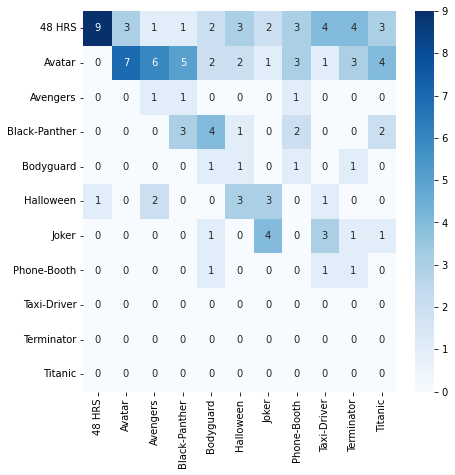

In [7]:
fig, ax = plt.subplots(figsize=(7,7))
import seaborn as sns
sns.heatmap(cm,annot = True,cmap = "Blues",fmt = 'g',xticklabels= np.unique(y_true),yticklabels = np.unique(y_true),ax = ax)

In [8]:
#from sklearn.metrics import classification_report
#matrix = classification_report(y_true,y_predicts)
#print(matrix)

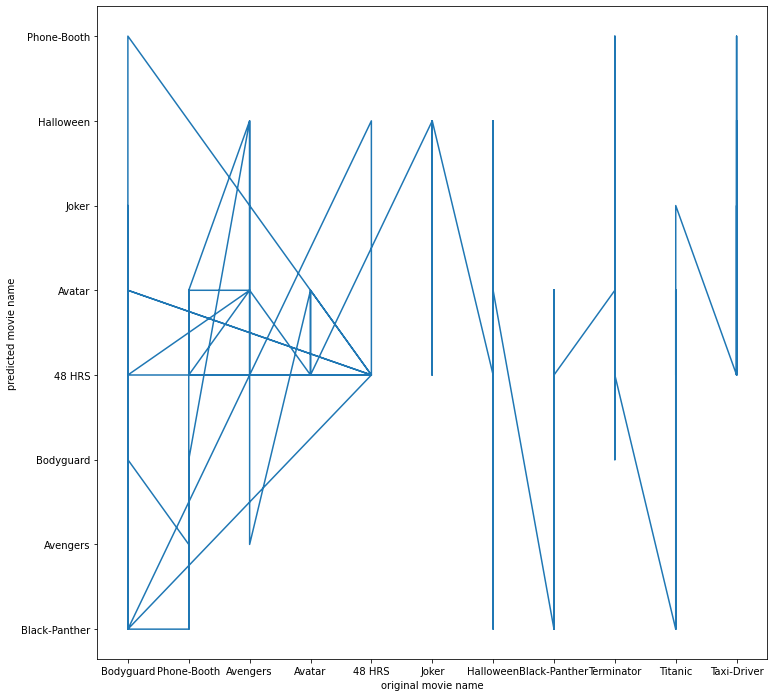

In [9]:
plt.figure(figsize= (12,12))
plt.plot(y_true,y_predicts)
#plt.hist(y_predicts,rwidth= 0.5)
plt.xlabel("original movie name")
plt.ylabel("predicted movie name")
plt.show()

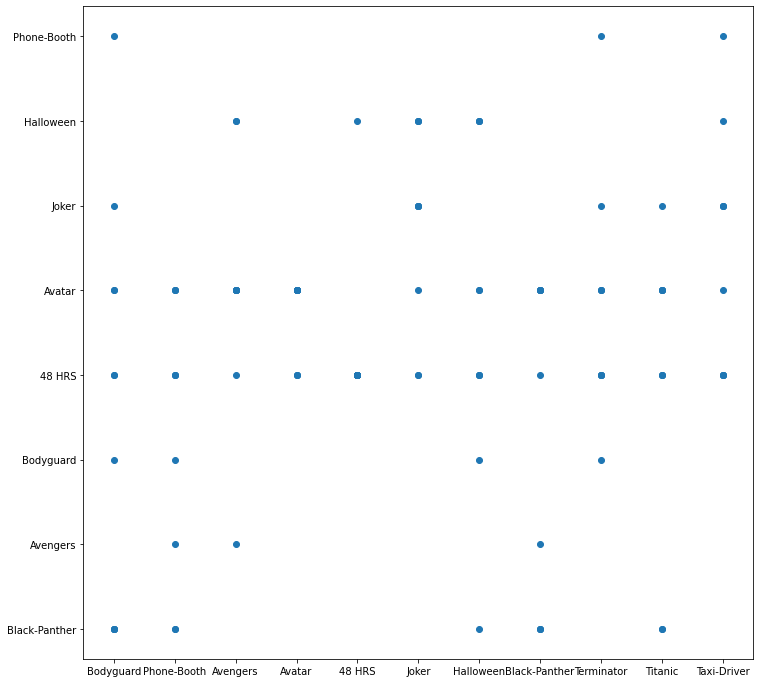

In [10]:
plt.figure(figsize = (12,12))
plt.scatter(y_true,y_predicts)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X,y)

with open('classifier.pickle', 'wb') as f: 
    pickle.dump (classifier, f)

with open('classifier.pickle', 'rb') as f: 
    clf=pickle.load(f)

with open('tfidfmodel.pickle', 'rb') as f: 
    tfidf=pickle.load(f)

with open('count.pickle', 'rb') as f: 
    count=pickle.load(f)

test_dataset = pd.read_csv("testdataset.csv") 
x_test= test_dataset.iloc[:,:-1]
y_true= test_dataset.iloc[:,-1] 
for i in range(len(x_test)):
    x_test["Sentence"][i] = tfidf.transform([x_test["Sentence"][i]]).toarray()

y_pred2 = []
for i in range(0, len(x_test)):
    s=clf.predict(x_test["Sentence"][i])
    y_pred2.append(s) 
y_predicts2=[]

for i in range(0, len(y_pred2)):
    for j in range(0,len(val)):
        if int(y_pred2[i])== val[1][j]:
            y_predicts2.append(val[0][j]) 
y_predicts2=np.array(y_predicts2)
print(y_predicts2[0:3])

['Black-Panther' 'Black-Panther' 'Avengers']


C:\Users\Gowtham\AppData\Local\Temp/ipykernel_27712/2732921265.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["Sentence"][i] = tfidf.transform([x_test["Sentence"][i]]).toarray()


In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
cm = confusion_matrix(y_predicts2,y_true)
print(cm)
knnacc=accuracy_score(y_true,y_predicts2)

[[9 3 1 1 2 3 2 3 4 4 3]
 [0 7 6 5 2 2 1 3 1 3 4]
 [0 0 1 1 0 0 0 1 0 0 0]
 [0 0 0 3 4 1 0 2 0 0 2]
 [0 0 0 0 1 1 0 1 0 1 0]
 [1 0 2 0 0 3 3 0 1 0 0]
 [0 0 0 0 1 0 4 0 3 1 1]
 [0 0 0 0 1 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


<AxesSubplot:>

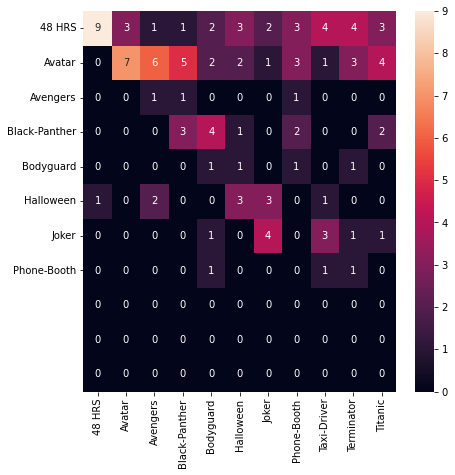

In [13]:
fig, ax = plt.subplots(figsize=(7,7))
import seaborn as sns
sns.heatmap(cm,annot = True,fmt = 'g',xticklabels= np.unique(y_true),yticklabels = np.unique(y_predicts2),ax = ax)

In [14]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(X,y)
with open('gnb.pickle', 'wb') as f:
    pickle.dump(gnb, f)

with open('gnb.pickle', 'rb') as f:
    nb = pickle.load(f)

with open('tfidfmodel.pickle', 'rb') as f:
    tfidf=pickle.load(f)

with open('count.pickle', 'rb') as f:
    count=pickle.load(f)

test_dataset = pd.read_csv("testdataset.csv")
x_test =test_dataset.iloc[:,:-1]
y_true=test_dataset.iloc[:,-1]
for i in range(len(x_test)):
    x_test["Sentence"][i] = tfidf.transform( [x_test["Sentence"][i]]).toarray()
y_pred4 = []
for i in range(0, len(x_test)):
    y_pred4.append(nb.predict(x_test["Sentence"][i]))

y_predicts4 = []

for i in range(0, len(y_pred4)):
    for j in range(0, len(val)):
        if int(y_pred4[i])==val[1][j]:
            y_predicts4.append(val[0][j])

y_predicts4=np.array(y_predicts4)

print(y_predicts4[0:3])

['Joker' 'Phone-Booth' 'Taxi-Driver']


C:\Users\Gowtham\AppData\Local\Temp/ipykernel_27712/3344575599.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["Sentence"][i] = tfidf.transform( [x_test["Sentence"][i]]).toarray()


In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
cm = confusion_matrix(y_predicts4,y_true)
print(cm)
nb_acc=accuracy_score(y_true,y_predicts4)

[[5 1 0 0 0 0 0 0 0 1 0]
 [0 7 1 2 0 0 0 0 0 2 2]
 [0 0 2 1 0 0 0 0 0 0 0]
 [0 0 3 6 0 0 0 0 0 0 1]
 [0 0 0 0 6 0 0 0 0 0 0]
 [1 0 1 0 0 8 0 0 1 0 1]
 [3 0 2 0 2 0 9 1 2 1 1]
 [1 2 0 0 0 0 0 7 1 0 0]
 [0 0 0 0 0 0 0 2 5 0 0]
 [0 0 1 0 3 1 1 0 1 6 1]
 [0 0 0 1 0 1 0 0 0 0 4]]


<AxesSubplot:>

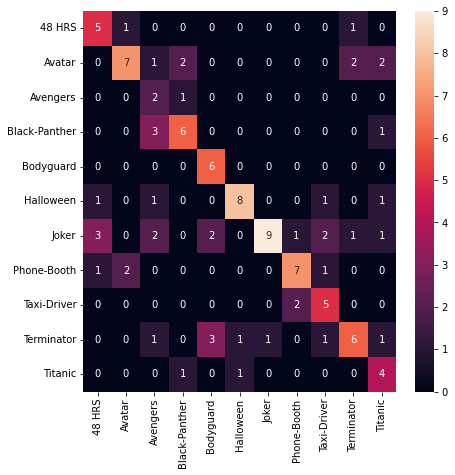

In [16]:
fig, ax = plt.subplots(figsize=(7,7))
import seaborn as sns
sns.heatmap(cm,annot = True,fmt = 'g',xticklabels= np.unique(y_true),yticklabels = np.unique(y_predicts4),ax = ax)

In [17]:
# Linear Regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y) 
with open('lr.pickle', 'wb') as f:
    pickle.dump(lr, f)
with open('lr.pickle', 'rb') as f: 
    lr = pickle.load(f)
with open('tfidfmodel.pickle', 'rb') as f:
    tfidf=pickle.load(f)

with open('count.pickle', 'rb') as f: 
    count=pickle.load(f)
test_dataset = pd.read_csv("testdataset.csv")
x_test = test_dataset.iloc[:,: -1] 
y_true= test_dataset.iloc[:,-1]

for i in range (len (x_test)):
    x_test["Sentence"][i] = tfidf.transform([x_test["Sentence"][i]]).toarray()
y_pred3 = []
for i in range(0, len(x_test)):
    y_pred3.append(lr.predict(x_test["Sentence"][i]))
y_predicts3 = []

for i in range(0, len(y_pred3)):
    for j in range(0, len(val)):
        if int(y_pred3[i])== val[1][j]:
            y_predicts3.append(val[0][j])

y_predicts3 = np.array(y_predicts3) 
print(y_predicts3[0:3])

['Bodyguard' 'Bodyguard' 'Bodyguard']


C:\Users\Gowtham\AppData\Local\Temp/ipykernel_27712/1469488201.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["Sentence"][i] = tfidf.transform([x_test["Sentence"][i]]).toarray()


In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
cm = confusion_matrix(y_predicts3,y_true)
print(cm)
lr_acc=accuracy_score(y_true,y_predicts3)

[[ 0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  2  0  0  0  0  0  0]
 [ 6  9 10 10  9  9 10  4  9 10  6]
 [ 0  0  0  0  0  0  0  4  1  0  3]
 [ 0  0  0  0  0  1  0  2  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]]


<AxesSubplot:>

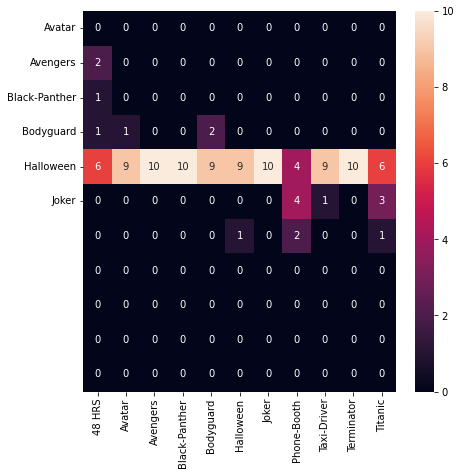

In [19]:
fig, ax = plt.subplots(figsize=(7,7))
import seaborn as sns
sns.heatmap(cm,annot = True,fmt = 'g',xticklabels= np.unique(y_true),yticklabels = np.unique(y_predicts3),ax = ax)

In [20]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(X,y)
with open('dtc.pickle', 'wb') as f:
    pickle.dump (dtc, f)

with open('dtc.pickle', 'rb') as f:
    vm=pickle.load(f)

with open('tfidfmodel.pickle', 'rb') as f: 
    tfidf=pickle.load(f)

with open('count.pickle', 'rb') as f:
    count=pickle.load(f)

test_dataset = pd.read_csv("Testdataset.csv")
x_test= test_dataset.iloc[:,:-1] 
y_true= test_dataset.iloc[:, -1]

for i in range (len(x_test)):
    x_test["Sentence"][i] = tfidf.transform([x_test["Sentence"][i]]).toarray()

y_pred= []

for i in range(0, len(x_test)):
    y_pred.append(vm.predict(x_test["Sentence"][i]))
y_predicts = []
for i in range(0, len(y_pred)):
    for j in range(0, len(val)):
        if int(y_pred[i])== val[1][j]:
            y_predicts.append(val[0][j])

y_predicts = np.array(y_predicts)
print(y_predicts[0:3])

['Halloween' 'Halloween' 'Halloween']


C:\Users\Gowtham\AppData\Local\Temp/ipykernel_27712/276627968.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["Sentence"][i] = tfidf.transform([x_test["Sentence"][i]]).toarray()


In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
cm = confusion_matrix(y_predicts,y_true)
print(cm)
dtc_acc=accuracy_score(y_true,y_predicts)

[[ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 9 10 10 10 11 10 10 10 10 10 10]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]]


<AxesSubplot:>

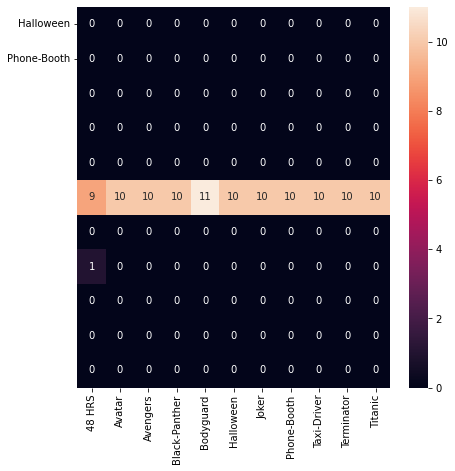

In [22]:
fig, ax = plt.subplots(figsize=(7,7))
import seaborn as sns
sns.heatmap(cm,annot = True,fmt = 'g',xticklabels= np.unique(y_true),yticklabels = np.unique(y_predicts),ax = ax)

Text(0.5, 1.0, 'Accuracy of the Models')

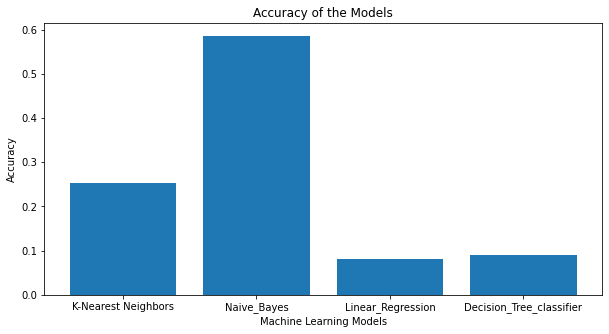

In [23]:
# Simple Bar Plot
# Create Data
fig, ax = plt.subplots(figsize=(10, 5))
x=['K-Nearest Neighbors', 'Naive_Bayes', 'Linear_Regression', 'Decision_Tree_classifier' ]
y = [knnacc, nb_acc, lr_acc, dtc_acc]
plt.bar(x,y)
plt.xlabel('Machine Learning Models')
plt.ylabel("Accuracy")
plt.title('Accuracy of the Models')

In [24]:
sample=['''NICK FURY
           NASA didn't authorize Selvig to test
           phase.''']
sample=tfidf.transform(sample).toarray()
print(clf.predict(sample))
print(nb.predict(sample))
print(vm.predict(sample))
print(lr.predict(sample))
y_pred = nb.predict(sample)
print(int(y_pred))
for i in range(0,len(val)):
    if y_pred == val[1][i]:
        print(val[0][i])

[1]
[2]
[5]
[3.96770187]
2
Avengers


In [25]:
data_Frame1=pd.read_csv('Film_credits.csv')
data_Frame2=pd.read_csv('Films.csv')

In [26]:
data_Frame1.columns = ['id','tittle','cast','crew']
data_Frame2= data_Frame2.merge(data_Frame1,on='id')

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFI_DataFrame = TfidfVectorizer(stop_words='english')
data_Frame2['overview'] = data_Frame2['overview'].fillna('')
TFI_DataFrame_mtx = TFI_DataFrame.fit_transform(data_Frame2['overview'])
TFI_DataFrame_mtx.shape

(4803, 20978)

In [28]:
from sklearn.metrics.pairwise import linear_kernel
Matching_Terms = linear_kernel(TFI_DataFrame_mtx, TFI_DataFrame_mtx)

In [29]:
Data_Indexing = pd.Series(data_Frame2.index, index=data_Frame2['original_title']).drop_duplicates()

In [30]:
def content_Based_Filter(Movie_Name, Matching_Terms=Matching_Terms):
    Data_index = Data_Indexing[Movie_Name]
    Matching_Terms_points = list(enumerate(Matching_Terms[Data_index]))
    Matching_Terms_points = sorted(Matching_Terms_points, key=lambda x: x[1], reverse=True)
    Matching_Terms_points = Matching_Terms_points[1:11]
    Film_indexing = [j[0] for j in Matching_Terms_points]
    return data_Frame2['original_title'].iloc[Film_indexing]

In [31]:
content_Based_Filter('The Terminator')

279             Terminator 2: Judgment Day
43                    Terminator Salvation
4080                          Silent House
2290                          Just Married
93      Terminator 3: Rise of the Machines
2662                 Elle s'appelait Sarah
449                        The Book of Eli
785                         Beyond Borders
1393                        Must Love Dogs
4590                               Show Me
Name: original_title, dtype: object